In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
import dataHack as dh
import contigency as cg
import matplotlib
#matplotlib.style.use('ggplot')

In [2]:
train= pd.read_csv('train.csv')

In [3]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.columns.tolist()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

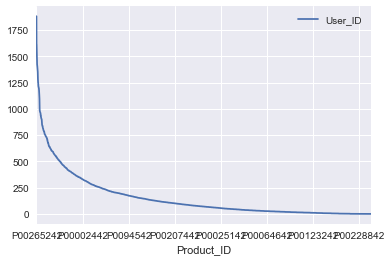

In [6]:
train[['User_ID',
 'Product_ID']].groupby('Product_ID').count().sort_values('User_ID',ascending=False).plot()

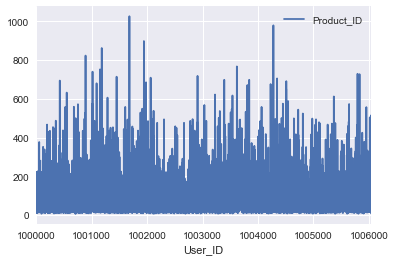

In [7]:
train[['User_ID',
 'Product_ID']].groupby('User_ID').count().plot()

In [8]:
cat_var= train.select_dtypes(include = ['object']).columns.values.tolist()
num_var = train.select_dtypes(include = ['int64','float64']).columns.values.tolist()

In [9]:
null_coll=train.columns[pd.isnull(train).any()].values.tolist()
for i in null_coll:
    print i,' - ',len(train[train[i].isnull()])

Product_Category_2  -  173638
Product_Category_3  -  383247


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,NaN,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [12]:
print train['Product_Category_3'].describe(),'\n\nMode - ',train['Product_Category_3'].mode()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64 

Mode -  0    16.0
dtype: float64


16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64


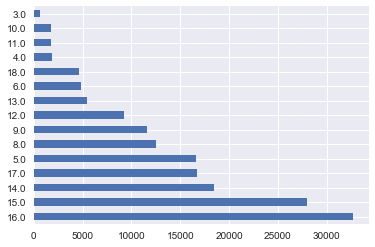

In [13]:
print train['Product_Category_3'].value_counts()
train['Product_Category_3'].value_counts().plot(kind='barh')

In [14]:
train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0].describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.832470e+05,383247.000000,383247.000000,383247.000000,209609.000000,0.0,383247.000000
mean,1.003025e+06,8.032230,0.412619,6.562778,12.186523,NaN,8221.836943
std,1.725263e+03,6.537406,0.492306,3.863748,4.236377,NaN,4624.898598
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,NaN,12.000000
25%,1.001514e+06,2.000000,0.000000,5.000000,8.000000,NaN,5328.000000
50%,1.003067e+06,7.000000,0.000000,5.000000,14.000000,NaN,7449.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,16.000000,NaN,9882.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,NaN,23961.000000


In [15]:
train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0].mode()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001680,P00265242,M,26-35,4,B,1,0,5,14.0,NaN,6855


In [16]:
for i in train.drop('Product_Category_3',1).columns.tolist():
    x=train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0][i].value_counts()
    print i,'\n' ,x[:min(7,len(x))],'\n\n'

User_ID 
1001680    818
1004277    770
1001941    679
1001181    666
1000889    618
1001150    608
1001015    588
Name: User_ID, dtype: int64 


Product_ID 
P00265242    1880
P00058042    1422
P00255842    1383
P00117942    1364
P00110942    1360
P00220442    1282
P00117442    1260
Name: Product_ID, dtype: int64 


Gender 
M    285032
F     98215
Name: Gender, dtype: int64 


Age 
26-35    152645
36-45     76728
18-25     68344
46-50     32327
51-55     27335
55+       15639
0-17      10229
Name: Age, dtype: int64 


Occupation 
4     49944
0     48667
7     41331
1     33915
17    25974
20    24339
12    20697
Name: Occupation, dtype: int64 


City_Category 
B    161930
C    115116
A    106201
Name: City_Category, dtype: int64 


Stay_In_Current_City_Years 
1     135534
2      70323
3      66017
4+     59364
0      52009
Name: Stay_In_Current_City_Years, dtype: int64 


Marital_Status 
0    225112
1    158135
Name: Marital_Status, dtype: int64 


Product_Category_1 
5     131922
8    

User_ID 



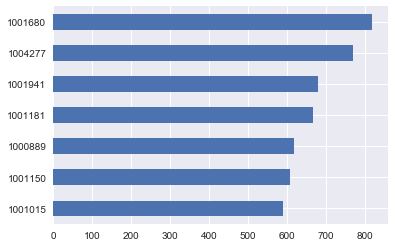

Product_ID 



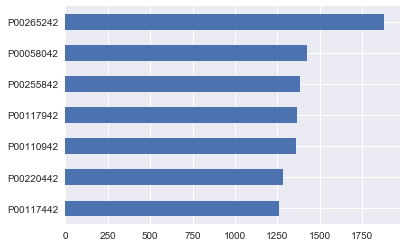

Gender 



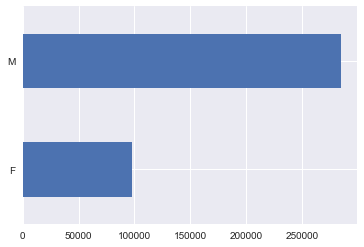

Age 



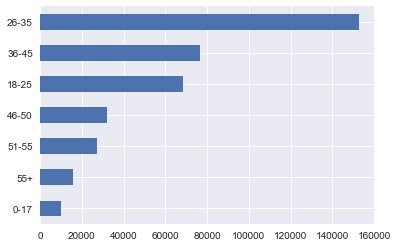

Occupation 



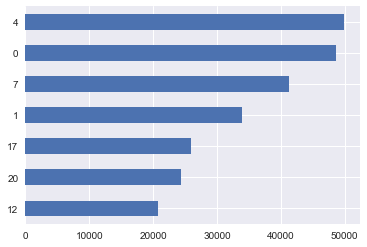

City_Category 



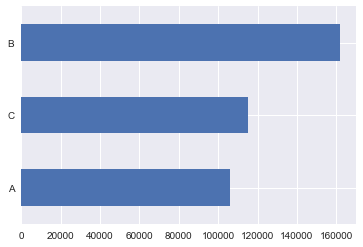

Stay_In_Current_City_Years 



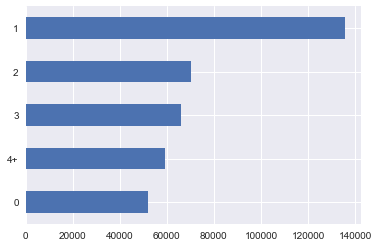

Marital_Status 



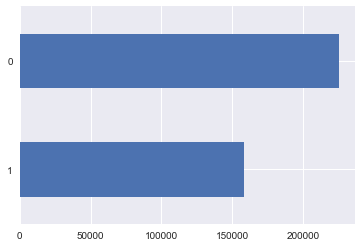

Product_Category_1 



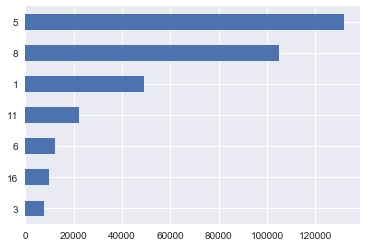

Product_Category_2 



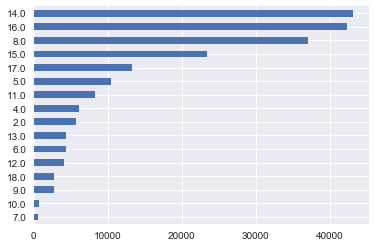

Purchase 



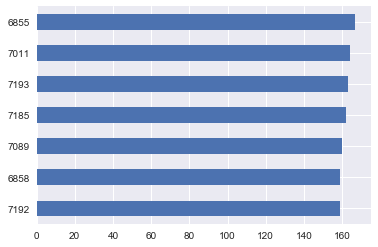

In [17]:
for i in train.drop('Product_Category_3',1).columns.tolist():
    x=train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0][i].value_counts()
    print i,'\n' 
    x[:min(7,len(x))].sort_values(ascending=True).plot(kind='barh')
    plt.show()

In [18]:
null_frame_p2=train[pd.isnull(train[['Product_Category_2']]).sum(axis=1) > 0]
null_frame_p3=train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0]

In [19]:
null_frame_p3[pd.isnull(null_frame_p3[['Product_Category_2']]).sum(axis=1) > 0]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887


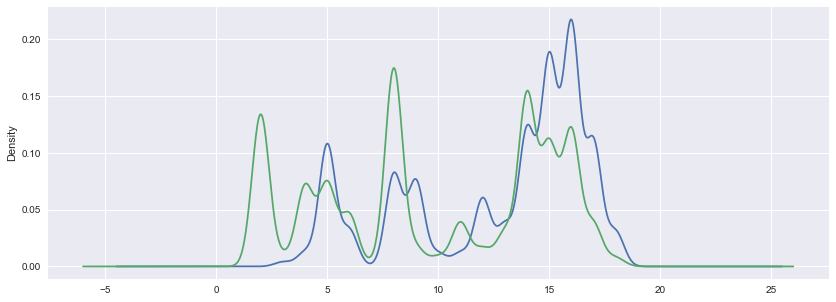

In [20]:
train['Product_Category_3'].plot(kind='kde',figsize=(14,5))
train['Product_Category_2'].plot(kind='kde',figsize=(14,5))

In [21]:
test= pd.read_csv('test.csv')

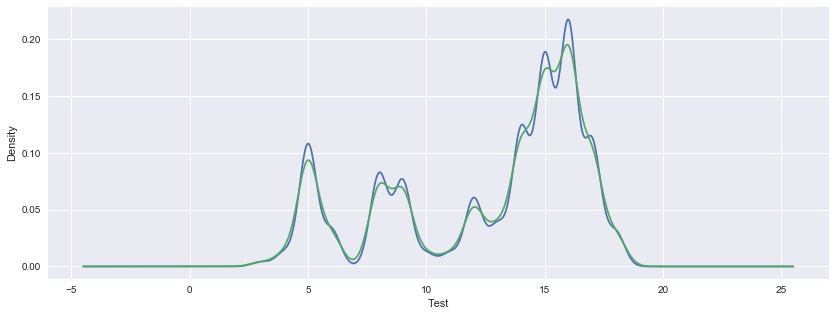

In [22]:
ax1=train['Product_Category_3'].plot(kind='kde',figsize=(14,5))
ax1.set_xlabel("Train")
ax=test['Product_Category_3'].plot(kind='kde',figsize=(14,5))
ax.set_xlabel("Test")
plt.show()

In [23]:
#train[pd.isnull(train[['Product_Category_3']]).sum(axis=1) > 0][i].value_counts()

In [24]:
train['Product_Category_2'].max()+1

19.0

In [25]:
train['Product_Category_3'].max()+1

19.0

In [26]:
train['Product_Category_2']=train['Product_Category_2']#.fillna(19)
train['Product_Category_3']=train['Product_Category_3']#.fillna(19)

In [27]:
pv=pd.pivot_table(train[['Product_Category_1','Product_Category_2','Product_Category_3','User_ID']],index=['Product_Category_1','Product_Category_2','Product_Category_3'])

In [28]:
pv.iloc[1]

User_ID    1.002896e+06
Name: (1, 2.0, 4.0), dtype: float64

In [29]:
pv

User_ID
Product_Category_1 Product_Category_2 Product_Category_3              
1                  2.0                3.0                 1.003043e+06
                                      4.0                 1.002896e+06
                                      5.0                 1.003010e+06
                                      6.0                 1.003021e+06
                                      8.0                 1.003024e+06
                                      9.0                 1.003047e+06
                                      11.0                1.003021e+06
                                      13.0                1.002853e+06
                                      14.0                1.003080e+06
                                      15.0                1.003020e+06
                                      16.0                1.002958e+06
                                      17.0                1.003273e+06
                                      18.0                1.003196e+06
                   3.0                4.0                 1.002792e+06
                   4.0                9.0                 1.002786e+06
                   5.0                6.0                 1.003089e+06
                                      8.0                 1.003078e+06
                                      9.0                 1.003110e+06
                                      12.0                1.003087e+06
                                      14.0                1.003126e+06
                                      15.0                1.003049e+06
                                      17.0                1.002977e+06
                                      18.0                1.003146e+06
                   6.0                8.0                 1.003127e+06
                                      13.0                1.002832e+06
                                      14.0                1.002954e+06
                                      15.0                1.003008e+06
                                      16.0                1.003085e+06
                   8.0                9.0                 1.003072e+06
                                      13.0                1.003117e+06
...                                                                ...
6                  8.0                13.0                1.003044e+06
                                      14.0                1.003107e+06
                                      15.0                1.003123e+06
                                      16.0                1.003092e+06
                   10.0               13.0                1.003047e+06
                                      16.0                1.003027e+06
                   11.0               13.0                1.003072e+06
                                      16.0                1.003178e+06
8                  9.0                14.0                1.002877e+06
                   10.0               16.0                1.003077e+06
                   11.0               16.0                1.002948e+06
                   12.0               17.0                1.003106e+06
                   13.0               14.0                1.003160e+06
                                      15.0                1.003156e+06
                                      16.0                1.003075e+06
                   14.0               15.0                1.002998e+06
                                      16.0                1.003266e+06
                                      17.0                1.003080e+06
                                      18.0                1.002693e+06
                   15.0               16.0                1.003059e+06
                   16.0               17.0                1.002996e+06
10                 13.0               16.0                1.003125e+06
                   14.0               16.0                1.003098e+06
                   15.0               16.0                1.002909e+06
11              

In [30]:
pv1=pd.pivot_table(train[['Product_Category_2','Product_Category_3','Product_Category_1']],index=['Product_Category_2','Product_Category_3'])

In [31]:
pv1.unstack()

Product_Category_1                                     \
Product_Category_3               3.0       4.0       5.0  6.0       8.0    
Product_Category_2                                                         
2.0                               1.0  1.000000  1.000000  1.0  1.000000   
3.0                               NaN  1.911917       NaN  NaN       NaN   
4.0                               NaN       NaN  2.766943  NaN  2.109809   
5.0                               NaN       NaN       NaN  1.0  2.399734   
6.0                               NaN       NaN       NaN  NaN  1.677715   
8.0                               NaN       NaN       NaN  NaN       NaN   
9.0                               NaN       NaN       NaN  NaN       NaN   
10.0                              NaN       NaN       NaN  NaN       NaN   
11.0                              NaN       NaN       NaN  NaN       NaN   
12.0                              NaN       NaN       NaN  NaN       NaN   
13.0                              NaN       NaN       NaN  NaN       NaN   
14.0                              NaN       NaN       NaN  NaN       NaN   
15.0                              NaN       NaN       NaN  NaN       NaN   
16.0                              NaN       NaN       NaN  NaN       NaN   

                                                                      \
Product_Category_3      9.0  10.0 11.0      12.0      13.0      14.0   
Product_Category_2                                                     
2.0                 1.000000  NaN  1.0       NaN  1.000000  1.000000   
3.0                      NaN  2.0  NaN       NaN       NaN       NaN   
4.0                 2.000804  NaN  NaN  2.964154       NaN  2.000000   
5.0                 3.288719  NaN  NaN  2.451284  4.000000  1.593148   
6.0                 5.000000  NaN  5.0       NaN  3.375494  1.000000   
8.0                 3.264183  6.0  NaN  5.000000  4.206186  4.489679   
9.0                      NaN  NaN  NaN  4.000000       NaN  4.615183   
10.0                     NaN  NaN  NaN       NaN  6.000000       NaN   
11.0                     NaN  NaN  NaN  5.000000  6.000000       NaN   
12.0                     NaN  NaN  NaN       NaN       NaN  4.966292   
13.0                     NaN  NaN  NaN       NaN       NaN  4.137512   
14.0                     NaN  NaN  NaN       NaN       NaN       NaN   
15.0                     NaN  NaN  NaN       NaN       NaN       NaN   
16.0                     NaN  NaN  NaN       NaN       NaN       NaN   

                                                            
Product_Category_3      15.0      16.0      17.0      18.0  
Product_Category_2                                          
2.0                 1.000000  1.000000  1.000000  1.000000  
3.0                 2.000000       NaN       NaN       NaN  
4.0                 2.000000       NaN       NaN       NaN  
5.0                 1.755082  3.000000  1.000000  1.287911  
6.0                 1.129055  1.995148       NaN       NaN  
8.0                 4.292142  4.412599  1.539919  2.849608  
9.0                 2.737805       NaN       NaN       NaN  
10.0                     NaN  6.173529       NaN       NaN  
11.0                1.046526  3.564682       NaN       NaN  
12.0                     NaN       NaN  8.000000       NaN  
13.0                6.431325  8.575256       NaN       NaN  
14.0                1.924765  4.369735  6.856259  8.000000  
15.0                     NaN  3.127102  1.000000  3.275362  
16.0                     NaN       NaN  7.674972       NaN

In [32]:
data=pd.concat([train,test])

In [33]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [34]:
data[cat_var].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [35]:
data['Gender']=data['Gender'].apply(lambda l: 1 if l=='M' else 0)

data['Age']=data['Age'].apply(lambda l:int(l.split('-')[0][:2]))

data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].apply(lambda l: int(l[:1]))

In [36]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4,1000002


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
City_Category                 783667 non-null object
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int64
User_ID                       783667 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [38]:
data['Product_Category_1']=data['Product_Category_1'].astype(str)
data['Product_Category_2']=data['Product_Category_2'].astype(str)
data['Product_Category_3']=data['Product_Category_3'].astype(str)

In [39]:
feat=['Age',
 'City_Category',
 'Gender',
 'Marital_Status',
 'Occupation',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
'Product_ID',
'User_ID',
 'Purchase',
 'Stay_In_Current_City_Years']

In [40]:
data[feat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
City_Category                 783667 non-null object
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null object
Product_Category_2            783667 non-null object
Product_Category_3            783667 non-null object
Product_ID                    783667 non-null object
User_ID                       783667 non-null int64
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 77.7+ MB


In [41]:
data['Product_ID']=data['Product_ID'].apply(lambda l: int(l[3:]))

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
City_Category                 783667 non-null object
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null object
Product_Category_2            783667 non-null object
Product_Category_3            783667 non-null object
Product_ID                    783667 non-null int64
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int64
User_ID                       783667 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 77.7+ MB


In [43]:
data=pd.get_dummies(data[feat])

In [44]:
data.head()

,Age,Gender,Marital_Status,Occupation,Product_ID,User_ID,Purchase,Stay_In_Current_City_Years,City_Category_A,City_Category_B,...,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_nan
0,0,0,0,10,69042,1000001,8370.0,2,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,10,248942,1000001,15200.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,10,87842,1000001,1422.0,2,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,10,85442,1000001,1057.0,2,1,0,...,0,0,0,0,0,0,0,0,0,1
4,55,1,0,16,285442,1000002,7969.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
trn=data.iloc[:train.index.max()+1]#.info()

In [46]:
tst=data.iloc[train.index.max()+1:].drop('Purchase',1)

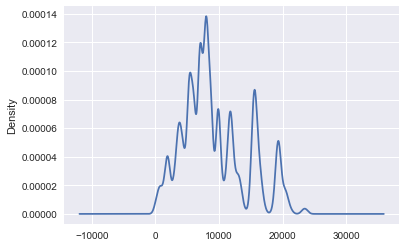

In [47]:
trn['Purchase'].plot(kind='kde')

In [48]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=100,max_depth=5)

In [49]:
X=trn.drop('Purchase',1)
y=trn['Purchase']

In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
scores = cross_val_score(clf1, X, y, cv=6)
print 'Cross-validated scores:', scores

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

In [ ]:
clf1.fit(X_train,y_train)

In [ ]:
X_test['Purchase']=clf1.predict(X_test)

In [ ]:
X_test['diff']=np.abs(X_test['Purchase'] -y_test)

In [ ]:
X_test['diff'].describe().plot(kind='barh')

In [ ]:
.

In [ ]:
X_test[['Purchase']][:5].sort_values('Purchase',ascending=False)

In [ ]:
import xgboost as xgb

In [ ]:
tst=tst.drop('Purchase',1)

In [ ]:
df_columns = X.columns.tolist()

dtrain = xgb.DMatrix(X_train, y_train, feature_names=df_columns)
dval = xgb.DMatrix(X_valid, y_valid, feature_names=df_columns)
dtest = xgb.DMatrix(tst, feature_names=df_columns)
dtrain_all = xgb.DMatrix(X, y, feature_names=df_columns)


xgb_params = {
    'eta': 0.05,
    'max_depth': 7,
    'subsample': 1.0,
    'colsample_bytree': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    #'Alpha' : 3
    #'silent': 1
    #'booster':'gbtree'
}

watchlist = [(dtrain, 'train'), (dval, 'valid')]
# Uncomment to tune XGB `num_boost_rounds`
bst = xgb.train(xgb_params, dtrain, num_boost_round=5000, evals= watchlist,early_stopping_rounds=50, verbose_eval=10)


In [ ]:
num_boost_round = bst.best_iteration
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

y_pred1 = model.predict(dtest)

In [ ]:
#tst['Purchase']=clf1.predict(tst)
tst['Purchase']=y_pred1

In [ ]:
len(test),len(tst)

In [ ]:
test['Purchase']=tst['Purchase']

In [ ]:
test[['User_ID',	'Product_ID',	'Purchase']].to_csv('sub8.csv',index=False)

In [ ]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(60, 60))
#pdata = corrdata.pivot("level_1", "level_0", "corr")#.fillna(0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('xlabel', fontsize=0)
plt.ylabel('ylabel', fontsize=0)

# Draw a heatmap with the numeric values in each cell
sns.heatmap(pv1.unstack(), annot=True,  linewidths=.5)